In [1]:
#爬取《猎场》热门短评内容和时间爬取 2017/11/21代码如下：
import re
import requests
import codecs
import time
import random
from bs4 import BeautifulSoup
absolute     = 'https://movie.douban.com/subject/26322642/comments'
absolute_url = 'https://movie.douban.com/subject/26322642/comments?start=23&limit=30&sort=new_score&status=P&percent_type='
url          = 'https://movie.douban.com/subject/26322642/comments?start={}&limit=30&sort=new_score&status=P'
header       = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:54.0) Gecko/20100101 Firefox/54.0','Connection':'keep-alive'}

def get_data(html):
    soup = BeautifulSoup(html,'lxml')
    comment_list = soup.select('.comment > p')
    next_page    = soup.select('#paginator > a')[2].get('href')
    date_nodes   = soup.select('.comment .comment-time')
    return comment_list,next_page,date_nodes

if __name__ == '__main__':
    f_cookies = open('cookie.txt','r')
    cookies   = {}
    for line in f_cookies.read().split(';'):
        name,value    = line.strip().split('=',1)
        cookies[name] = value
    html = requests.get(absolute_url,cookies=cookies,headers=header).content
    f_cookies.close()
    #comment_list = []
    #获取评论
    comment_list,next_page,date_nodes = get_data(html)
    #print(comment_list,next_page,date_nodes)
    comment_list = []
    i = 0
    #next_page=''
    while (i<20 or len(next_page)!=0):
        print(absolute+next_page)
        html = requests.get(absolute+ next_page,cookies=cookies,headers=header).content
        comment_list, next_page,date_nodes = get_data(html)
        #print(comment_list, next_page,date_nodes)
        #with open("comments.csv",'w',encoding='utf-8') as f:
        with codecs.open("comments.csv",'a') as f:
            for idx,node in enumerate(comment_list):
                comment  = node.get_text().strip().replace("\n","")
                #print(comment)
                for idy,date in enumerate(date_nodes):
                    if idx==idy:
                        dates = date.get_text().strip()
                try:
                    f.writelines(comment+u'\t'+dates+u'\n')
                    print(dates)
                except UnicodeEncodeError:
                    print('UnicodeEncodeError:%s',comment)
        i = i+ 1
        time.sleep(1+float(random.randint(1,100)) / 40)
    print('Process end...')

https://movie.douban.com/subject/26322642/comments?start=47&limit=20&sort=new_score&status=P&percent_type=
2017-11-06
2017-11-07
2017-11-08
2017-11-06
2017-11-08
2017-11-07
2017-11-12
2017-11-08
2017-11-07
2017-11-08
2017-11-10
2017-11-07
2017-11-07
2017-11-08
2017-11-06
2017-11-07
2017-11-08
2017-11-10
2017-11-07
2017-11-07
https://movie.douban.com/subject/26322642/comments?start=74&limit=20&sort=new_score&status=P&percent_type=
2017-11-09
2017-11-09
2017-11-08
2017-11-11
2017-11-10
2017-11-08
2017-11-10
2017-11-06
2017-11-16
UnicodeEncodeError:%s 要是郑秋冬和罗伊人复合了就果断弃剧并给编剧寄刀片😡
2017-11-09
2017-11-16
2017-11-08
2017-11-06
2017-11-07
2017-11-11
2017-11-13
2017-11-15
UnicodeEncodeError:%s 胡歌这次被骂惨了😭
2017-11-12
https://movie.douban.com/subject/26322642/comments?start=94&limit=20&sort=new_score&status=P&percent_type=
2017-11-11
2017-11-10
2017-11-08
2017-11-10
2017-11-06
2017-11-16
UnicodeEncodeError:%s 要是郑秋冬和罗伊人复合了就果断弃剧并给编剧寄刀片😡
2017-11-09
2017-11-16
2017-11-06
2017-11-08
2017-11-06
2017-11-07
2

2017-11-07
2017-11-07
2017-11-06
2017-11-06
2017-11-06
2017-11-06
2017-11-06
2017-11-14
2017-11-06
2017-11-12
2017-11-11
2017-11-07
2017-11-07
2017-11-14
2017-11-08
2017-11-19
2017-11-06
2017-11-14
2017-11-14
2017-11-14
https://movie.douban.com/subject/26322642/comments?start=575&limit=20&sort=new_score&status=P&percent_type=
2017-11-08
2017-11-07
2017-11-15
2017-11-22
2017-11-09
2017-11-20
2017-11-09
2017-11-10
2017-11-07
2017-11-11
2017-11-17
2017-11-15
2017-11-17
2017-11-06
2017-11-19
2017-11-10
2017-11-11
2017-11-14
2017-11-19
2017-11-08


KeyboardInterrupt: 

In [11]:
#数据清洗
import pandas as pd
import matplotlib.pyplot as plt
date_name=['comment','date']
df = pd.read_csv('./comments.csv',delimiter='\t',header=None,names=date_name,encoding= 'gbk').head(50)
df['date'] = pd.to_datetime(df['date'])

In [12]:
df

,comment,date
0,严重和宣传片不符啊，就是男女主的你侬我侬还很无聊，而且女主演技真的很烂。希望赶紧到后面商战,2017-11-06
1,剧情是模仿二十年前的韩剧么？三角恋旧爱重逢还特么有一个得癌的。整体画面质感像五年前的网剧。,2017-11-07
2,越来越发现豆瓣是一群人的意淫，在这群人的眼中，外国片才是他们的精神食粮，而对于中国片，永远是...,2017-11-08
3,刷一星是神马心态？不能拿它和美剧比，没有可比性，跟很多大陆剧比算良心了吧。题材新颖，前所未有...,2017-11-06
4,罗伊人的演技太辣眼了，第一集几乎看不下去。。,2017-11-08
5,客观来说，女主角我不喜欢，导致差点看不下去。但为了我歌忍到了第二集，就冲这剧本，敢写传销，我...,2017-11-07
6,感觉是从来没有朝九晚五上过班的编剧导演演员的强行尬演…………,2017-11-12
7,一出狱就穿阿玛尼 然后说着“绝望”的台词 那一刻我对这剧也很绝望,2017-11-08
8,是这样 实习这么久唯一宣的一部好剧吧 本子是真的很好 色调也是真的没质感 全员演技在线 当然...,2017-11-07
9,前四集情节紧凑，时间跨越这么大还是比较难拍，其实感情戏也看的很出彩的，男女主角都演的挺好的。...,2017-11-08


In [15]:
print(df['date'].value_counts())

2017-11-08    11
2017-11-07    10
2017-11-06     8
2017-11-10     6
2017-11-16     4
2017-11-09     4
2017-11-11     3
2017-11-12     2
2017-11-15     1
2017-11-13     1
Name: date, dtype: int64


In [17]:
data6 = df[(df['date']>='2017-11-06') & (df['date']<='2017-11-08')]
data6.to_csv('6.txt',encoding='utf-8',index=False)
print(data6.size)

58


In [19]:
获取2017-11-09 – 2017-11-17 数据：
date9 = df[(df['date']>='2017-11-09') & (df['date']<='2017-11-17')]
date9.to_csv('9.txt',encoding='utf-8',index=False)
print(date9.size)

42


[0.5, 0.0899103035037283, 0.8690757600943885, 0.9995161111457916, 0.9999999535659944, 0.8688049512173898, 0.9877809430888274, 0.9282090288741685, 0.9999989474245053, 0.9999995848795422, 0.999670579608324, 0.999999999999986, 0.39428533072192007, 0.8839895014309385, 0.25791437279780605, 0.8982458868745168, 0.9999991603978907, 0.541821220032513, 0.3387519767748054, 0.11399691574672399, 0.47789898805809705, 0.9999961610904442, 0.9842391579608119, 0.9922276001733062, 0.11399691574672399, 0.47789898805809705, 0.8642101263686064, 0.9999961610904442, 0.9842391579608119, 0.9922276001733062]


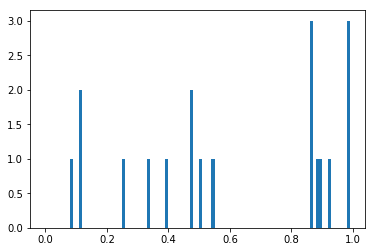

In [33]:
# 情感分析代码：
import numpy as np
from snownlp import SnowNLP
import matplotlib.pyplot as plt
from snownlp import sentiment
from snownlp.sentiment import Sentiment

comment = []

with codecs.open('./6.txt', mode='r',encoding='utf-8') as f:
    rows = f.readlines()
    for row in rows:
        if row not in comment:
            comment.append(row.strip('\n'))

def snowanalysis(lists):
    sentimentslist = []
    for li in lists:
        #print(li)
        #进行分词
        s = SnowNLP(li)
        #print(s.sentiments)
        sentimentslist.append(s.sentiments)
    print(sentimentslist)
    #hist画柱状图 
    #hist函数，给定一堆数据，统计数据在某一值的个数。plot是给定横/纵坐标向量，描绘点列
    '''
    参数：
    n : array or list of arrays(箱子的值)
    bins : array(箱子的边界) 个数越多，条形带越紧密
    patches : list or list of lists
    '''
    plt.hist(sentimentslist, bins=np.arange(0,1,0.01))
    plt.show()

snowanalysis(comment)

加载图片成功！


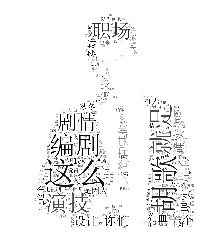

生成词云成功！


In [52]:
#生成词云
import pickle
from os import path
import codecs
import jieba
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
'''安装wordcloud时有可能报如下错误：
error: Microsoft Visual C++ 14.0 is required. Get it with "Microsoft Visu
C++ Build Tools": http://landinghub.visualstudio.com/visual-cpp-build-tools
解决方案：
到网站：https://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud 下载对应的 whl文件
E:\pythonshell>python -m pip install wordcloud-1.3.2-cp36-cp36m-win_amd64.whl
'''
def make_worldcloud(file_path):
    text_from_file_with_apath = codecs.open(file_path,'r',encoding='UTF-8').read()
    wordlist_after_jieba = jieba.cut(text_from_file_with_apath,cut_all=False)
    wl_space_split = " ".join(wordlist_after_jieba)
    #print(wl_space_split)
    #background_Image  = plt.imread('./douban.png')
    #用上面的plt.imread 读图片会有错误
    background_Image  = np.array(Image.open('./douban.png'))
    print('加载图片成功！')
    #设置词云样式
    stopwords = STOPWORDS.copy()
    stopwords.add("哈哈")
    stopwords.add("还是") #可以添加多个屏蔽词
    wc = WordCloud(
        width  = 768 ,
        height = 2014,
        background_color = 'white', #设置背景颜色
        mask = background_Image, #设置背景图片
        font_path = './simsun.ttf',# 设置中文字体，若是有中文的话，这句代码必须添加，不然会出现方框，不出现汉字
        max_words = 300, #设置最大实现的字数
        stopwords = stopwords, #设置停用词
        max_font_size = 300, #设置字体最大值
        random_state = 50, # 设置有多少种随机生成状态，即有多少种配色方案
    )
    wc.generate_from_text(wl_space_split) # 开始加载文本
    img_colors = ImageColorGenerator(background_Image)
    wc.recolor(color_func=img_colors,random_state=3) #字体颜色为背景图片的颜色,这里为黑色
    plt.imshow(wc) # 显示词云图
    plt.axis('off') # 是否显示x轴、y轴下标
    plt.show()
    
    #d= path.dirname(__file__)
    wc.to_file(path.join('./','h12.jpg'))
    print('生成词云成功！')

make_worldcloud('./9.txt')
    

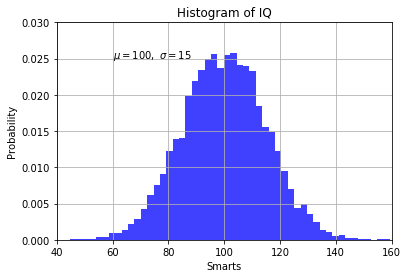

In [54]:
# 直方图绘制
import numpy as np
import matplotlib.pyplot as plt
mu,sigma = 100,15
x = mu + sigma*np.random.randn(10000)

#数据直方图
n, bins,patches = plt.hist(x,50,normed=1,facecolor='b',alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
#添加标题
plt.title('Histogram of IQ')
#添加文件
plt.text(60,.025,r'$\mu=100,\ \sigma=15$')
#plt.axis([xmin, xmax, ymin, ymax]) 上面例子里的axis()命令给定了坐标范围。
plt.axis([40,160,0,0.03])
plt.grid(True)
plt.show()